<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [3]:
# Adding pprint for better display
from pprint import  pprint

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

With this we quickly see the count, mean, standard deviation, etc... for each numerical column.  In these cases the results make sense, but it is important to note that certain numerical values don't make sense to get statistics on.  For example, the average ID number of employees in a company does not mean a thing.

### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [4]:
# Read in sat scores into dataframe as df_sat
df_sat = pd.read_csv('sat_scores.csv')
df_sat_ind = pd.read_csv('sat_scores.csv')

In [5]:
# Check out the data types
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

We get integer value (specifically, Int64) types for all the numerical columns (which makes sense), and an object type for the `State` column.  The dtype for the state column is really a string object, but for some reason pandas does not specify that. 

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
# Display frist 10 rows of DataFrame
df_sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


Pandas DataFrame Objects, provide us with very useful methods for getting a feel for the data.  From the `DataFrame.shape` medthod, we see that the  that the table consists of 52 rows and 4 columns. The columns are : 
  - `State`, US state where data was collected 
  - `Rate`,  participation rate in each state (%)
  - `Verbal`, average Verbal score for that state 
  - `Math`, average Math score for that state 

---

#### Note : 
Lacking the necessary information, I am only **assuming** that the `Verbal`, and `Math` columns represent average values.  It could also be the median, or even the mode, but I'm going to go with average.  In a similar fashion, I am **assuming** that the `Rate` column is talking about participation rates, that is :
<br> <br>
$$\text{Rate} = \frac{\text{Number of students who took the SATs}}{\text{Number of Students Eligible to take the SATs}}$$

---
#### Note :<br>

I would like to point out that it is a bit weird that there are 52 rows. Unless I am going crazy, there are only 50 states in the US.  So there might be some repeated states or something else.  To see if there are any repeated rows (States), we can make a new dataframe which groups rows by State get the count for each.  Our DataFrame isn't very big so we could just go and look manually, but if we want to be more rigorous about it, we can sum the count of any column to see if it matches up to 52.`

---

In [7]:
# Group DataFrame by State, and get a count for each row
state_groupby = df_sat.groupby('State').count()

# Sum the count of any column (Rate in this case) to see if it is equal to 52
print("Nrates = {}".format(sum(state_groupby['Rate'])))

Nrates = 52


Alright, there are no repeated states, which is good but we still need to figure out why there are 52 rows instead of 50.  Let us get the list of rows (thankfully there aren't many) and see if we can spot anything unusual.

In [8]:
# Display unique row names
pprint(df_sat['State'].unique())

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)


Okay we found the issue.  There is a row for All which I assume is the average scores and rates for the entire country. There is also a row for Washington DC (`DC`), which I guess is a separate entity.

### Change :
Before continuing, I would like to change the column index.  The State column would be perfect for referecing specific rows (it makes more sense than a number).

In [9]:
# Set data frame index to the State column
df_sat.set_index('State', inplace=True)

# Check that it worked
df_sat.head()

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516


Lastly, to describe our data, there is a DataFrame method `describe()` that gives us over all statistics of numerical columns.

In [10]:
# Get overall statistics of SAT dataframe
df_sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


With this we quickly see the count, mean, standard deviation, etc... for each numerical column. In these cases the results make sense, but it is important to note that certain numerical values don't make sense to get statistics on. For example, the average ID number of employees in a company does not mean a thing.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

#### Note : 
To recap (mostly for myself) the general structure of the data dictionary is : 
   
  ```
      data_dictionary = { column_name : { 
                                          dtype : variable type,
                                          description : "some string describing the variable"
                                        } 
                          shape       : (Number of rows, Number of columns)
                        }
  ```
  
The `type` of the actual dictionary entries are as follows : 
 - `dtype` : numpy.dtype
 - `description` : string (str)
 - `shape`       : tuple of ints
 
Luckily, pandas dataframes have a to_dict() method.  So we can start from there.

In [11]:
# Get dictionary of columns : dtypes 
data_dict = df_sat.dtypes.to_dict()

# The issue with this is that the string is only listed as type "object", so let's change that :
data_dict['State'] = np.dtype(str)
pprint(data_dict)

{'Math': dtype('int64'),
 'Rate': dtype('int64'),
 'State': dtype('<U'),
 'Verbal': dtype('int64')}


---
#### Side Note :
Before building on top of this dictionary, I would like to point out that the `numpy.dtype` result for the string prints as $\lt$`U`.  The `U` stands for *Unicode*, and from wikipedia : 
<br>
<br>
*Unicode is a computing industry standard for the consistent encoding, representation, and handling of text expressed in most of the world's writing systems.*
<br>
<br>
So the dtype is indeed a string (text).

---

#### Back to the Dictionary :
Sorry about the side note, and back to the dictionary! Here's what we have so far : 
<br>
<br>
`data_dict = {column_name : dtype}`
<br>
<br>
To finish the column dictionary, which is a sub dictionary of the data one, we just need to add the key-value pairs for the descriptions.  The value associated to the column name right now is just a value.  We need to turn that into a dictionary so that it can also hold the description.

In [12]:
# Convert dtype values in column_dict to a {'dtype' : dtype} dicitonary. 
for k,v in data_dict.items():
    data_dict[k] = {'dtype' : v}
    
# Check result
pprint(data_dict)

{'Math': {'dtype': dtype('int64')},
 'Rate': {'dtype': dtype('int64')},
 'State': {'dtype': dtype('<U')},
 'Verbal': {'dtype': dtype('int64')}}


Now we have to update those dictionaries with the appropriate description :

In [14]:
# Update data_dictionaries with descriptions.
data_dict['State'].update({'description' : "US states (abbreviated), also includes a row for all states (All), and for Washington DC (DC)"""})
data_dict['Math'].update({'description' : "Average Math SAT score"})
data_dict['Verbal'].update({'description' : "Average Verbal SAT score"})
data_dict['Rate'].update({'description' : "SAT participation rate (%)"})
pprint(data_dict)

{'Math': {'description': 'Average Math SAT score', 'dtype': dtype('int64')},
 'Rate': {'description': 'SAT participation rate (%)', 'dtype': dtype('int64')},
 'State': {'description': 'US states (abbreviated), also includes a row for '
                          'all states (All), and for Washington DC (DC)',
           'dtype': dtype('<U')},
 'Verbal': {'description': 'Average Verbal SAT score', 'dtype': dtype('int64')}}


Now that we have sub-dictionaries for all columns, we can create the main one, including the shape of the data frame.

In [15]:
# Create main Data Dictionary with sub-dict of column info, and dataframe shape
data_dict.update({'shape' : df_sat.shape})
#sat_data_dict = column_dict

#### Check our work : 

In [18]:
print('data_dict : \n\n')
pprint(data_dict)

data_dict : 


{'Math': {'description': 'Average Math SAT score', 'dtype': dtype('int64')},
 'Rate': {'description': 'SAT participation rate (%)', 'dtype': dtype('int64')},
 'State': {'description': 'US states (abbreviated), also includes a row for '
                          'all states (All), and for Washington DC (DC)',
           'dtype': dtype('<U')},
 'Verbal': {'description': 'Average Verbal SAT score', 'dtype': dtype('int64')},
 'shape': (52, 3)}


Everything seems to be in order.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

---
### Note : 
I have consulted the distplot documentation, and seems to me like we can't really do that much in terms of tweeking.  Luckily, seaborn plots return *matplotlib* axes.  So for this section, I will be doing the basic plot with seaborn as instructed, but using matplotlib commmands for the tweeking. 

---

For starters in this section, I will define some font dictionaries so that I can tweek the text as I see fit : 

In [19]:
# Define Font dictionary for axis labels
font_axes = {'family': 'DejaVu Sans',
            'color':  'black',
            'weight': 'normal',
            'size': 14,
            }

font_title = {'family': 'DejaVu Sans',
            'color':  'black',
            'weight': 'bold',
            'size': 16,
            }

### Participation Rate Distribution, `Rate`

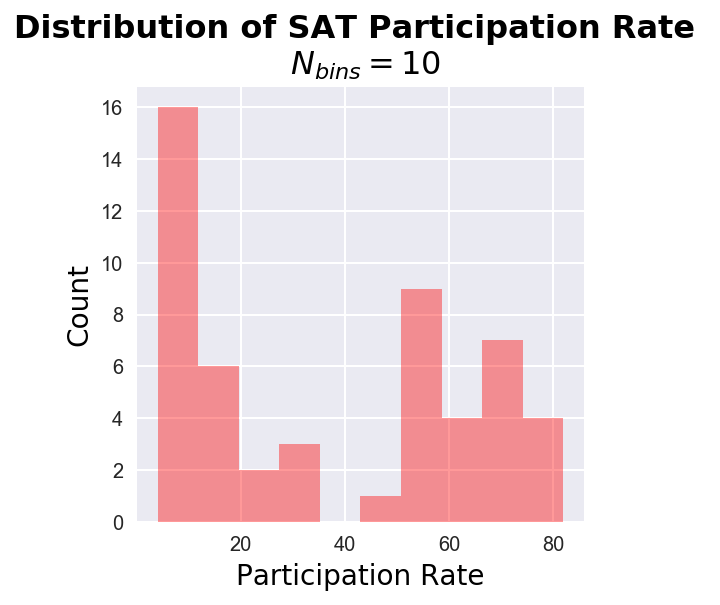

In [20]:
# Initialize figure, and axis to have them as objects.
fig_rate, ax_rate = plt.subplots(nrows=1,ncols=1, figsize=(4,4))

# Use seaborn to make a histogram (distplot) of the data in the column
sns.distplot(df_sat['Rate'],kde=False, bins=10, color='red', ax=ax_rate)

# Tweek plot (x/y labels, and add title)
ax_rate.set_xlabel('Participation Rate', fontdict=font_axes)
ax_rate.set_ylabel('Count', fontdict=font_axes)
ax_rate.set_title('Distribution of SAT Participation Rate \n $N_{bins} = 10$', fontdict=font_title)

The participation rate distribution shows two peaks, with not much in between.  Surprisingly, the bin with the most counts corresponds to the lowest participation rates.  16 States with only about 10%  of the students taking the SATs is pretty shocking..

### Math Score Distribution, `Math`

In [ ]:
# Initialize figure and axis to have them as objects.
fig_math, ax_math = plt.subplots(nrows=1,ncols=1, figsize=(10,5))

# Use seaborn to make a histogram (distplot) of the data in the column
sns.distplot(df_sat['Math'], kde=False, bins=20, color='green', ax=ax_math)

# Tweek axis labels and add title
ax_math.set_xlabel('Math Score', fontdict=font_axes)
ax_math.set_ylabel('Count', fontdict=font_axes)
ax_math.set_title('Distribution of SAT Math Scores \n $N_{bins} = 20$', fontdict=font_title)

### Verbal Score Distribution, `Verbal`

In [ ]:
# declare figure and axis to get them as objects.
fig_verb, ax_verb = plt.subplots(nrows=1,ncols=1, figsize=(10,5))

# Use seaborn to make a histogram (distplot) of the data in the column.
sns.distplot(df_sat['Verbal'], kde=False, bins=20, color='darkblue', ax=ax_verb)

# Tweek axis labels, and add title
ax_verb.set_xlabel('Verbal Score', fontdict=font_axes)
ax_verb.set_ylabel('Count', fontdict=font_axes)
ax_verb.set_title('Distribution of SAT Verbal Scores \n $N_{bins} = 20$', fontdict=font_title)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)


#### Note : 
Tweeking a PairGrid object seems to be pretty limited.  So I am just leaving it as is.  I did add a hue by state, which comes with a legend.  It's not very useful, but it sure is pretty! (except that the legend is way too long!)

In [ ]:
# Use pairplot to get a grid of scatter plots for each column in the Dataframe.  Except for diagonal which shows
# their distribution.
sns.pairplot(df_sat,palette='cool')

#### What does this visualization tell us about the data?

Beyond the distributions, which we've talked about previously. We can see from the scatter plots that all three variables : `Rate`, `Verbal`, and `Math` are all correlated to each other.  `Verbal` and `Math` scores seem to have a positive correlation, while `Rate` is negatively correlated to both of those.  It is interesting to see how tightly correlated `Math` and `Verbal` scores are.  The data shows very little spread (aside from one point), and almost all fits on a line.  Eyeballing it, it seems that the slope of that line is pretty close to 1.
<br>
<br>
It is interesting to see the negative correlation between `Rate` and the scores.  Basically, for a given state, the more people who partcipate, the less the average score is.  This might imply that in States with low participation rate, only the Students who are doing exceptionally well academically plan to go to College.  This is a gross generalization, but it also seems  like the states with the highest scores (but lowest rates) are either farm states, or flyover (not sure how to word it).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

### Note : 
I think stacked histograms are a bit hard to read, so I'm comparing it to a normal one.  We lose information on the other one, but we can easily see which bin has most counts.

In [ ]:
# Define Axis Grid
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, sharey=True,figsize=(10,4))

# Plot stacked=True and stacked=False versions of the histograms
df_sat[['Math', 'Verbal']].plot.hist(bins=20, stacked=True, ax=ax1)
df_sat[['Math', 'Verbal']].plot.hist(bins=20, stacked=False, ax=ax2)

# Set axis labels and title
ax1.set_xlabel('Score', fontdict=font_axes)
ax1.set_ylabel('Count', fontdict=font_axes)
ax2.set_xlabel('Score', fontdict=font_axes)
fig.suptitle('Math and Verbal SAT scores \n $N_{bins} = 20$', fontdict=font_title)

# Add text to explicitly show which plot is the stacked histogram.
ax1.text(x=440, y=14, s='stacked \nhistograms')
ax2.text(x=440, y=14, s='overlaping \nhistograms')

After looking at these side by side, it is true that we lose too much information when they are overlapping.

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [ ]:
df_sat[['Verbal', 'Math']].plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Luckily, SAT scores have a maximum value, that means we can convert all average scores in `Math` and `Verbal` to percentages of maximum score.  That is, instead of reading : 600 points out of 800 points on the math portion of the SAT, will read 75% of the points.  So let's make a DataFrame, `df_scaled` which has all columns scaled to percentages.

In [ ]:
# Create copy of SAT dataframe and scale it so that scores and 
# rates are percentages.
df_scaled = df_sat.copy()
df_scaled[['Math', 'Verbal']] *= (1./8.)
df_scaled.head()

Now that we have the scaled dataframe, let's see what it looks like when plotted.

In [ ]:
ax = df_scaled[['Rate', 'Verbal', 'Math']].plot.box()
ax.set_ylabel('Percentage (%)', fontdict=font_axes)
ax.set_ylim(0,100)
ax.set_title('SAT Statistic Distributions', fontdict=font_title)

---
### Note : 
Doing this has converted the data type of the `Math` and `Verbal` columns from ints to floats.  For the sake of completion, let us create a data dictionary with the correct information.

---

In [ ]:
# Make a copy of the data dictionary
scaled_sat_dict = dict(sat_data_dict)

# Replace dtypes in new dict with dtypes in scaled dataframe
scaled_sat_dict['Math']['dtype']  = df_scaled.dtypes['Math']
scaled_sat_dict['Verbal']['dtype'] = df_scaled.dtypes['Verbal']

# Print to check
pprint(scaled_sat_dict)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




---
### Note : 
Judging by the question, I guess the assumption that the values represent the mean (not the median) for each state.  So that's nice.

---
### Change : 
It does not make sense to me to tatke the average over the *entire* data set.  There is 1 row that already represents `All` values!  With this, I will the omiting that row in these calculations.  On a related note, I will not be using that row's values for the overall averages.  Assuming it represents the average values for **All** test takers.  That is not the same thing as taking the average of a set of averages.

---

Back to business, let's see what the average value was :

In [ ]:
avg_verbal = np.mean(df_sat['Verbal'][df_sat.index != 'All'])
print('overall average verbal score = ' + str(avg_verbal))

Now that we have that, let's see which states have values above that average, and also count how many are in that list : 

In [ ]:
high_verbal_states = df_sat.loc[df_sat['Verbal'] > avg_verbal].index
pprint(high_verbal_states)
print('\n N states above average : ' + str(len(high_verbal_states)))

There are 24 states that above the mean SAT verbal score, which leads to believe that the distribution is somewhat symmetric.  This can also be seen from the histogram we made earlier.  Although it has two peaks (one high and one low), there some symmetry accross the mean.

### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

Same idea as above, let's start by getting the mean.

In [ ]:
# Get median value of Verbal Scores
median_verbal = np.median(df_sat['Verbal'][df_sat.index != 'All'])
print('Median Verbal Score : {}'.format(median_verbal))

# 
upper_median_verbal = df_sat.loc[df_sat['Verbal'] > median_verbal].index
pprint(upper_median_verbal)
print('\n N States Above Median : ' + str(len(upper_median_verbal)))



Let's compare the two : 

In [ ]:
pprint(upper_median_verbal)
pprint(high_verbal_states)

The results are exactly the same.  Again, we have a very symetric distribution.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [ ]:
df_sat['score_differential'] = df_sat['Verbal'] - df_sat['Math']
df_sat.head()

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [ ]:
df_verbal = df_sat[df_sat['score_differential'] > 0].copy()
df_verbal.sort_values(by='score_differential', ascending=False, inplace=True)
df_verbal = df_verbal[0:10]
df_verbal.head(3)

In [ ]:
df_math = df_sat[df_sat['score_differential'] < 0].copy()
df_math['score_differential'] *= -1
df_math.sort_values(by='score_differential', ascending=False, inplace=True)
df_math = df_math[0:10]
df_math.head(3)

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


In [ ]:
corr_matrix = df_sat.corr()


mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr_matrix, annot=True, fmt='g', mask=mask)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [ ]:
df_sat.describe()

- `count` = number of non-empty cells in the column
- `mean`  = the average value for that column
- `std` : the standard deviation of the column
- `min` : the minimum value in the column
- `max` : the maximum value in the column
- `xx%` : the xxth percentile, where xx% of values in the column are below that value.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

- *Describe how the covariance matrix is different from the correlation matrix* <br><br>
The covariance matrix, describes an assumed linear relationship between variables.  The correlation coefficient matrix, is almost the same thing except that is nomalized.  That is, correlation coefficients are between -1 and 1.  A value close to 1 means that the two variables have a high positive correlation (one increases as the other one increases).  A value close -1 means they have a high negative correlation (one decreases as the other one increases).  A value close to 0 means they are not correlated (or it is veeeeerrrryyyyy unlikely).  The covariance of two variables is basically the same thing except the values are a little harder to interpret because they depend on the scale/values of the variables.

- *What is the process to convert the covariance into the correlation?*<br><br>
To go from covariance to correlation coefficient, $\rho$ one simply has to divide by the product of the standard deviations of the two variables.  That is : <br><br>
$$
\rho = \frac{\text{cov}(X, Y)}{\sigma_x\sigma_y}
$$

- *Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?*<br><br>
As I said before, it's because the values of the correlation coefficient will always range from -1 to 1, we say they are normalized.  This is easier to interpret than a seemingly arbitrary number (not actually arbitrary, depends on the scale).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [81]:
df_drugs = pd.read_csv('drug-use-by-age.csv')
print("DF shape : {}".format(df_drugs.shape))
df_drugs.head()

DF shape : (17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


#### Cleaning : 
- There are some missing variables marked as " - ".  I will convert these to NaN values, this way they will be ignored in plotting, and we won't lose the row by deleting it.<br><br>
 
- The `age` column is a little bit weird.  Some are actual numbers, others are ranges, and they come as strings.  With this, I am converting age ranges to the mid-point in the range.<br><br>

- The `age` column and those with missing variables (marked as "-") are string types.  If I want to be able to manipulate these at will I need them as numbers.  I will convert all columns to float values.<br><br>

- The `n` column is a bit ambiguous, it could mean the number of people surveyed, or the number of users.  I'm going to **assume** that it means the number of people surveyed.  I will rename it accodingly.

In [82]:
# Convert '-' values to NaN
df_drugs.replace(to_replace='-', value=np.nan, inplace=True)

# Convert ages to numbers / midpoints of ranges
df_drugs.loc[10,'age'] = 22.5
df_drugs.loc[11,'age'] = 24.5
df_drugs.loc[12,'age'] = 27.5
df_drugs.loc[13,'age'] = 32.0
df_drugs.loc[14,'age'] = 42.0
df_drugs.loc[15,'age'] = 57.0
df_drugs.loc[16,'age'] = 65.0

# Convert all columns to float values
for c in df_drugs.columns:
    df_drugs[c] = df_drugs[c].astype(float)
    
# Rename the n column
df_drugs.rename(columns={'n':'n_sample'}, inplace=True)

# Check our work
df_drugs.head()

,age,n_sample,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13.0,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

#### Recap :

<br>
Before starting the EDA, let's recap what each of the columns mean : 
<br>
<br>
- `age` : age, or median age of a group (years).
- `n_sample` : number of people surveyed for the data.
- `xxxx-use` : Percentage of people who have used the drug at least once in the past 12 months (%).
- `xxxx-frequency` : Median number of times a user in an age group used xxxxx drurg in the past 12 months.

#### Which drug has most users ? 

I will start my quest by creating a related DataFrame that just contains the number of users for each drug, that is : 
<br>
<br>
$$
N_{users,i} = n_{sample,i} \times U_i
$$
<br>

where $U_i$ is the percentage of users of a specific drug in a certain age group.  For this I will just loop through the column names, see if it's a xxxx-use column, if so, create a new column (in new dataframe) based on the name and assign in the values of the multiplication.

In [86]:
# Initialzie new dataframe : 
n_users = pd.DataFrame()

# Loop through columns and find drug-use columns
for c in df_drugs.columns :
    if ('-use' not in c):
        continue
    else :
        # Get new column name by replacing -use with -n
        # name should be : drug-n
        col_name = c.replace('-use', '-n')
        
        # Create new column : 
        n_users[col_name] = np.floor(df_drugs[c] * df_drugs['n_sample'] / 100)
        
# Check our work : 
n_users.head()

,alcohol-n,marijuana-n,cocaine-n,crack-n,heroin-n,hallucinogen-n,inhalant-n,pain-releiver-n,oxycontin-n,tranquilizer-n,stimulant-n,meth-n,sedative-n
0,109.0,30.0,2.0,0.0,2.0,5.0,44.0,55.0,2.0,5.0,5.0,0.0,5.0
1,234.0,93.0,2.0,0.0,0.0,16.0,68.0,66.0,2.0,8.0,8.0,2.0,2.0
2,505.0,242.0,2.0,0.0,2.0,44.0,72.0,108.0,11.0,25.0,22.0,2.0,5.0
3,863.0,428.0,14.0,2.0,5.0,62.0,73.0,162.0,23.0,59.0,44.0,8.0,11.0
4,1226.0,688.0,30.0,0.0,3.0,103.0,91.0,189.0,33.0,73.0,55.0,9.0,6.0


Now that we have this new column, let's get the sum of each column and compare them in a barchart.

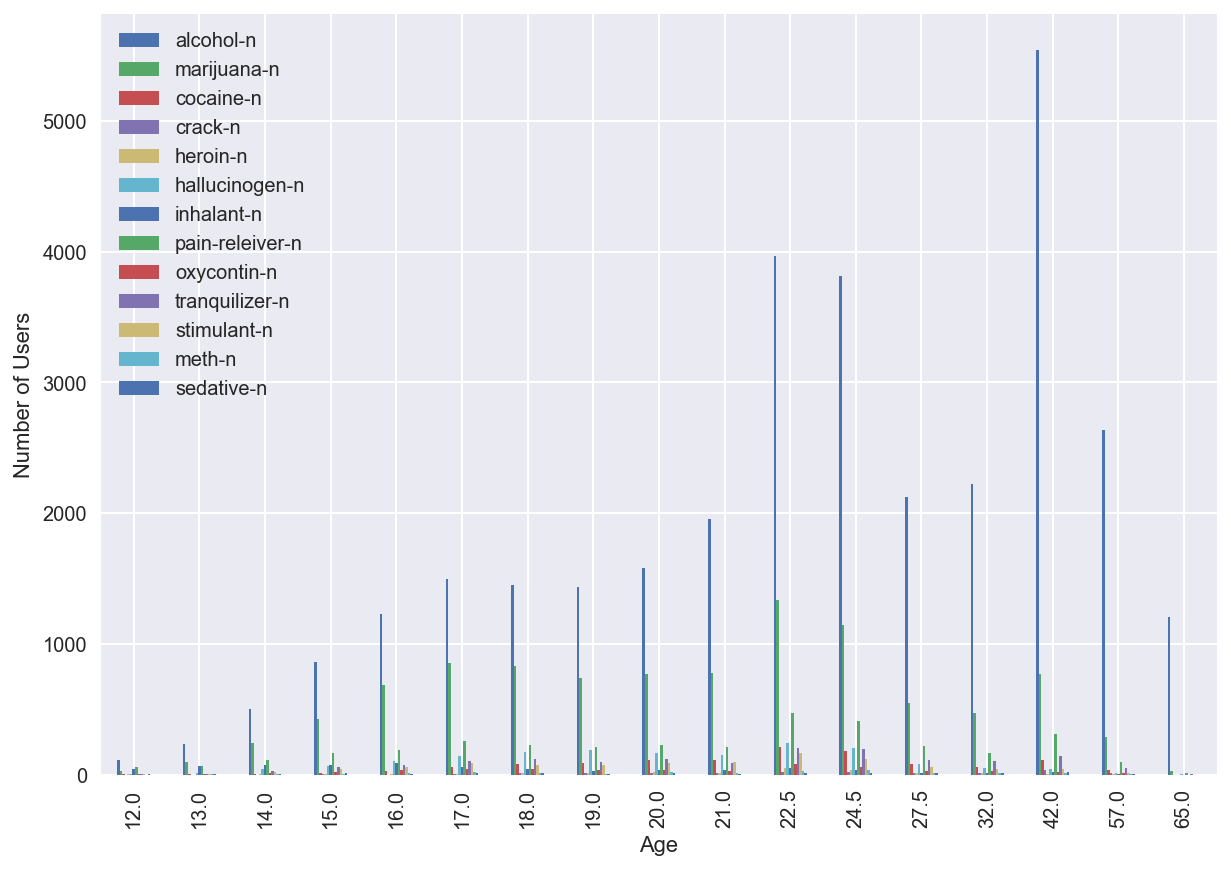

In [94]:
# Doing the matplotlib dance
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
n_users.plot(kind='bar', ax=ax)
ax.set_xticklabels(df_drugs['age'])
ax.set_ylabel("Number of Users")
ax.set_xlabel("Age")

Well that's a little confusing... Clearly alcohol and marijuana are the most widely used drugs, and it's hard to tell what is going on with the other ones.  Let's remove alcohol and marijuana to see what the rest of them are doing.

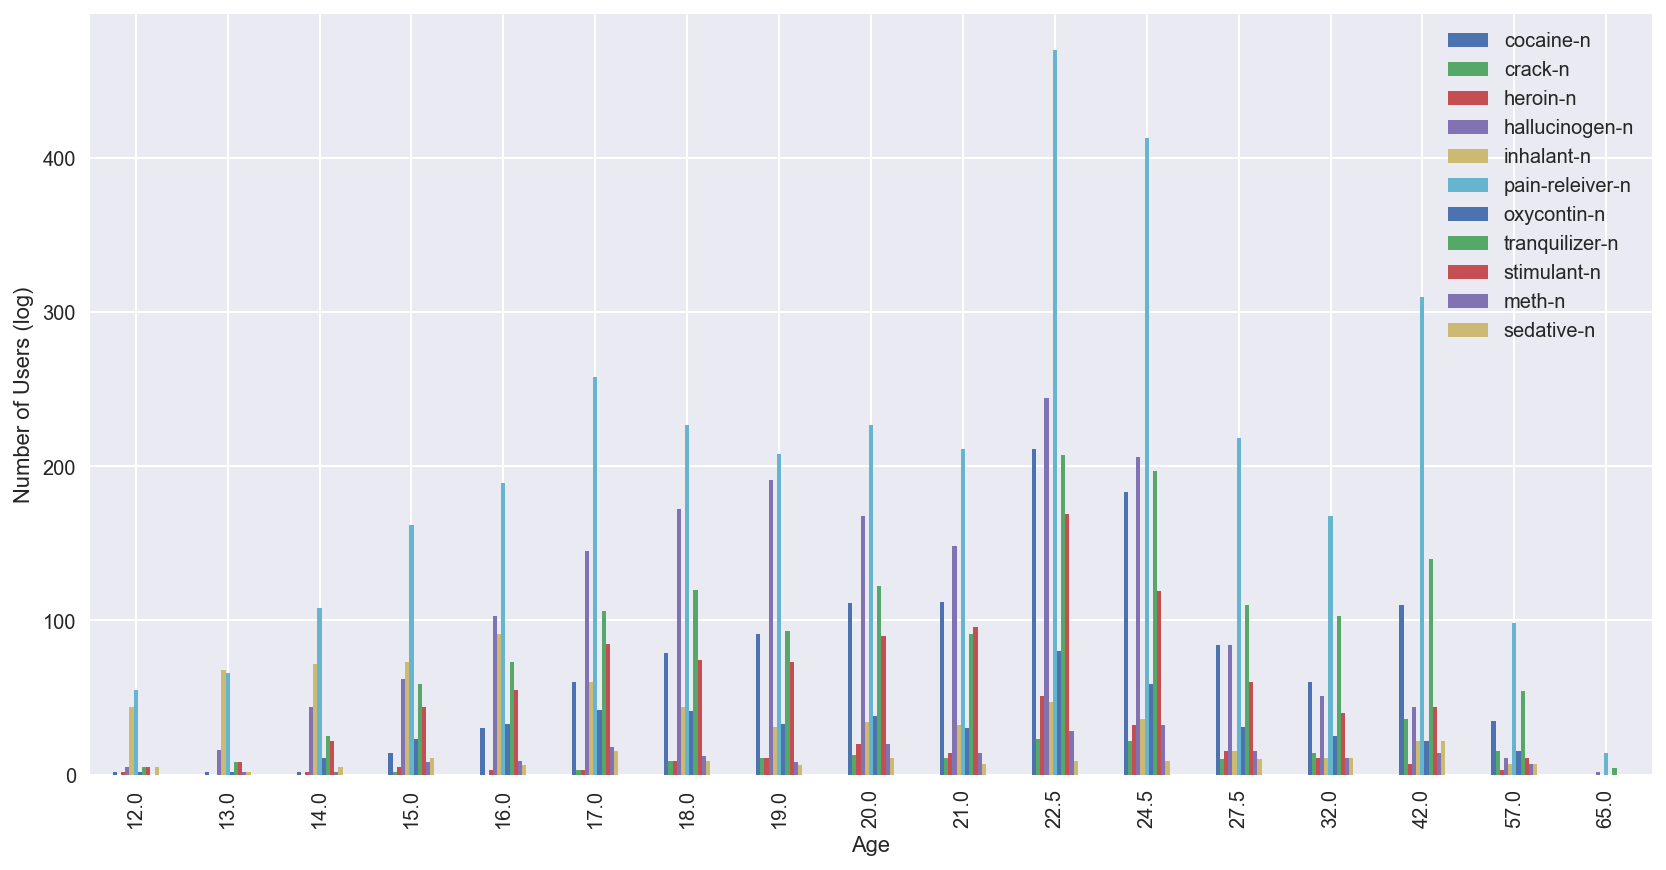

In [102]:
# Get column list and remove alcohol and marijuana from it
cols = [c for c in n_users.columns if ('alcohol' not in c) & ('marijuana' not in c)]

# matplotlib dance
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))
n_users[cols].plot(kind='bar', ax=ax)
ax.set_xticklabels(df_drugs['age'])
ax.set_ylabel("Number of Users (log)")
ax.set_xlabel("Age")

Aside from alcohol and marijuana, it seems like pain relievers have the most users.

#### Summary Statistics : 
Before moving on, I suppose we should get some summary statistics on our values data frames, but it seems a bit weird to get averages over the columns since the age groups differ so much.

In [26]:
# Summary statistics on drug dataframe
df_drugs.describe()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,25.617647,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,15.356726,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,27.500000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,65.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [103]:
# Summary statistics n_users data frame
n_users.describe()

,alcohol-n,marijuana-n,cocaine-n,crack-n,heroin-n,hallucinogen-n,inhalant-n,pain-releiver-n,oxycontin-n,tranquilizer-n,stimulant-n,meth-n,sedative-n
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1903.588235,590.000000,69.764706,9.941176,11.058824,99.764706,40.411765,200.117647,28.647059,89.235294,58.529412,11.764706,8.529412
std,1425.491541,375.189286,62.921111,10.170242,13.226255,78.412793,25.802274,120.086886,20.691004,60.468514,45.154066,9.107205,5.013951
min,109.000000,29.000000,0.000000,0.000000,0.000000,2.000000,0.000000,14.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,1206.000000,286.000000,14.000000,0.000000,3.000000,44.000000,22.000000,108.000000,15.000000,54.000000,22.000000,7.000000,6.000000
50%,1497.000000,688.000000,60.000000,10.000000,7.000000,84.000000,36.000000,208.000000,30.000000,93.000000,55.000000,11.000000,9.000000
75%,2219.000000,776.000000,110.000000,14.000000,14.000000,168.000000,60.000000,227.000000,38.000000,120.000000,85.000000,15.000000,11.000000
max,5543.000000,1336.000000,211.000000,36.000000,51.000000,244.000000,91.000000,470.000000,80.000000,207.000000,169.000000,32.000000,22.000000


#### Usage over Age :

Since we are ploting things over the different age groups, let's look at the percent usage by age group.  I purposefully omit actual data points here so that it is a little bit clearer (There are just lines instead).  This way we can also identify trends and such.  The different columns are split over 4 plots so that we can get a better view of the situations.  Also please note that the colors do not necessarily math the previous ones. Please refer to legend.

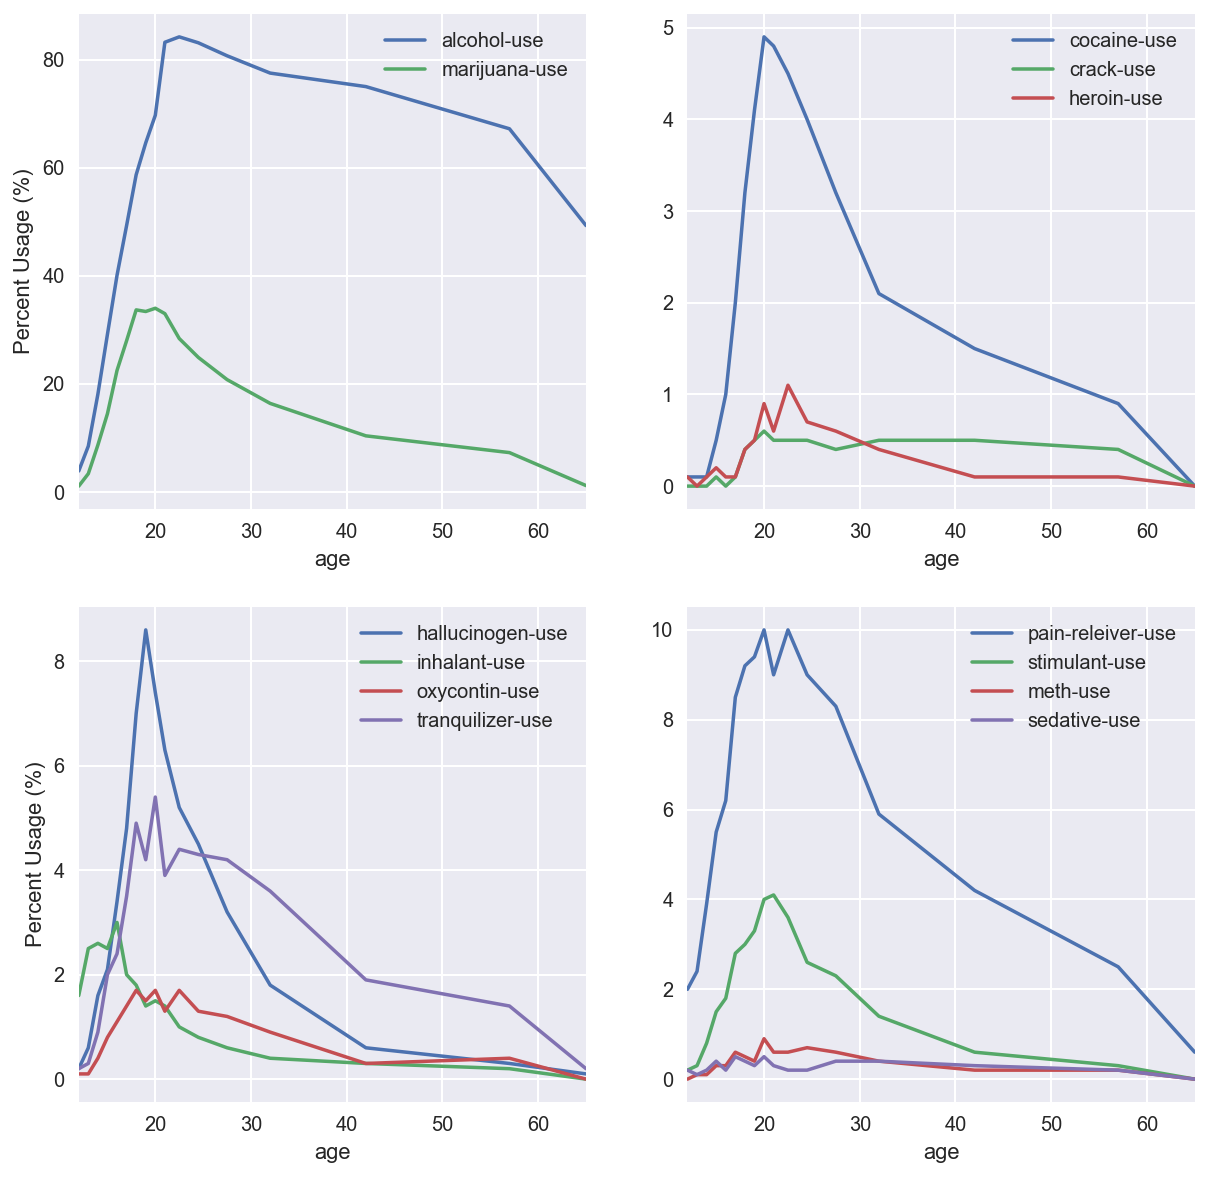

In [120]:
# usage over time

# Matplotlib dance
f, [(ax, ax2), (ax3, ax4)] = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df_drugs.plot(x='age', y='alcohol-use', ax=ax)
df_drugs.plot(x='age', y='marijuana-use', ax=ax)


df_drugs.plot(x='age', y='cocaine-use', ax=ax2)
df_drugs.plot(x='age', y='crack-use', ax=ax2)
df_drugs.plot(x='age', y='heroin-use', ax=ax2)

df_drugs.plot(x='age', y='hallucinogen-use', ax=ax3)
df_drugs.plot(x='age', y='inhalant-use', ax=ax3)
df_drugs.plot(x='age', y='oxycontin-use', ax=ax3)
df_drugs.plot(x='age', y='tranquilizer-use', ax=ax3)

df_drugs.plot(x='age', y='pain-releiver-use', ax=ax4)
df_drugs.plot(x='age', y='stimulant-use', ax=ax4)
df_drugs.plot(x='age', y='meth-use', ax=ax4)
df_drugs.plot(x='age', y='sedative-use', ax=ax4)

ax.set_ylabel('Percent Usage (%)')
ax3.set_ylabel('Percent Usage (%)')

Here we do the same thing as above but for the frequency (not usage)

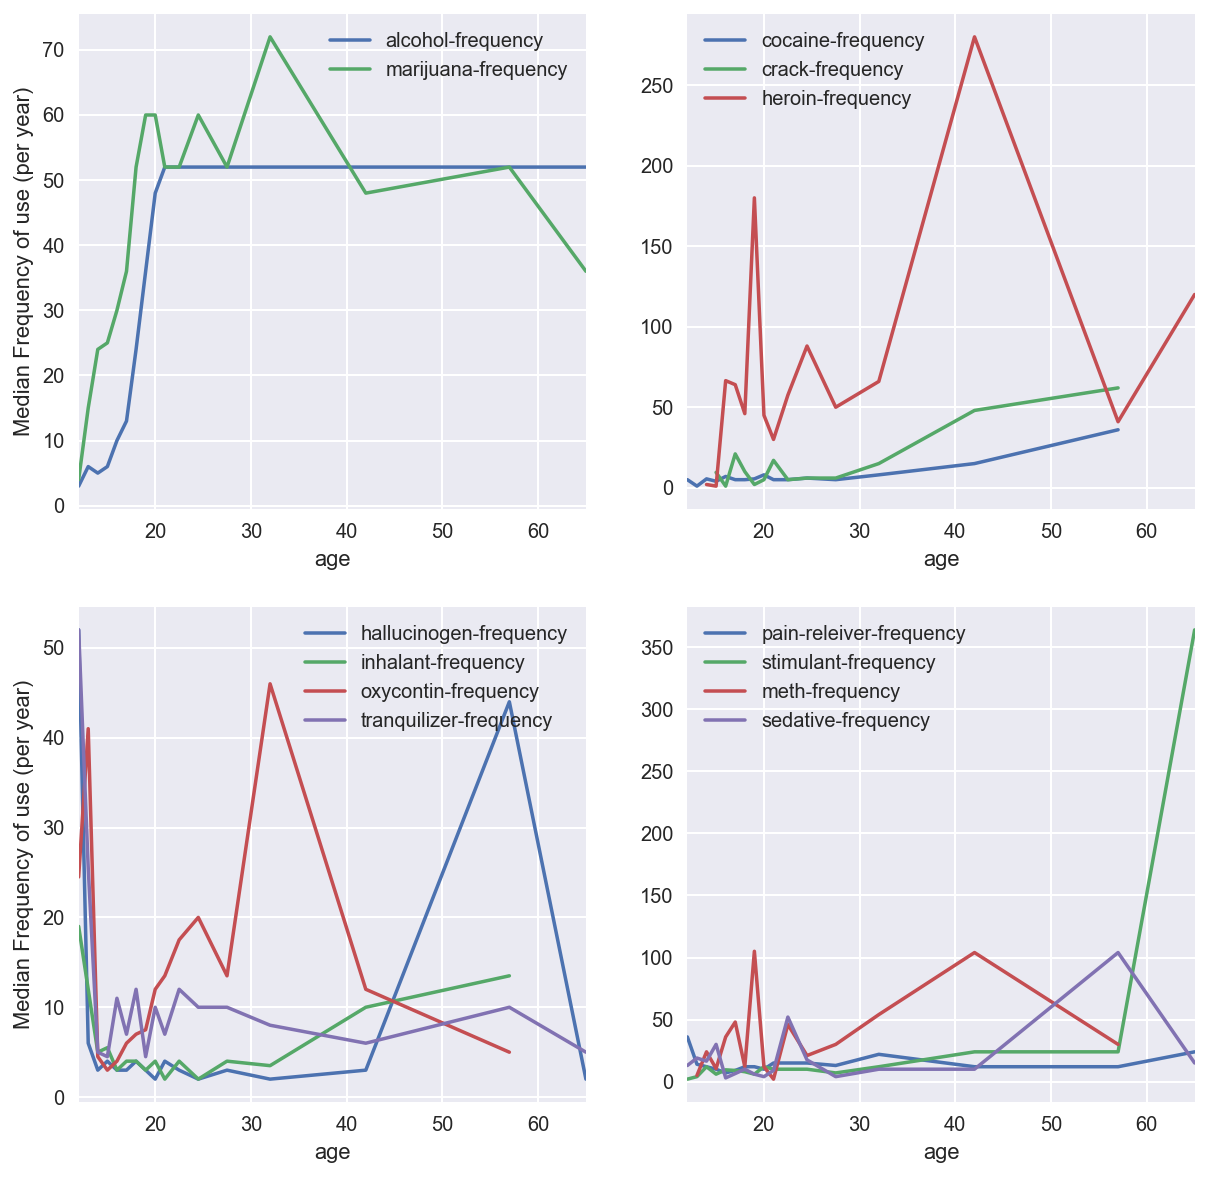

In [121]:
# frequency over time

# Matplotlib dance
f, [(ax, ax2), (ax3, ax4)] = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df_drugs.plot(x='age', y='alcohol-frequency', ax=ax)
df_drugs.plot(x='age', y='marijuana-frequency', ax=ax)


df_drugs.plot(x='age', y='cocaine-frequency', ax=ax2)
df_drugs.plot(x='age', y='crack-frequency', ax=ax2)
df_drugs.plot(x='age', y='heroin-frequency', ax=ax2)

df_drugs.plot(x='age', y='hallucinogen-frequency', ax=ax3)
df_drugs.plot(x='age', y='inhalant-frequency', ax=ax3)
df_drugs.plot(x='age', y='oxycontin-frequency', ax=ax3)
df_drugs.plot(x='age', y='tranquilizer-frequency', ax=ax3)

df_drugs.plot(x='age', y='pain-releiver-frequency', ax=ax4)
df_drugs.plot(x='age', y='stimulant-frequency', ax=ax4)
df_drugs.plot(x='age', y='meth-frequency', ax=ax4)
df_drugs.plot(x='age', y='sedative-frequency', ax=ax4)

ax.set_ylabel('Median Frequency of use (per year)')
ax3.set_ylabel('Median Frequency of use (per year)')

#### How do these Variables correlate with eachother?
<br>
Here we use the seaborn heat map to visualize the correlation matrix of ALL the variables.  I know it's a bit overwhelming, but we'll break it down a bit later don't worry.

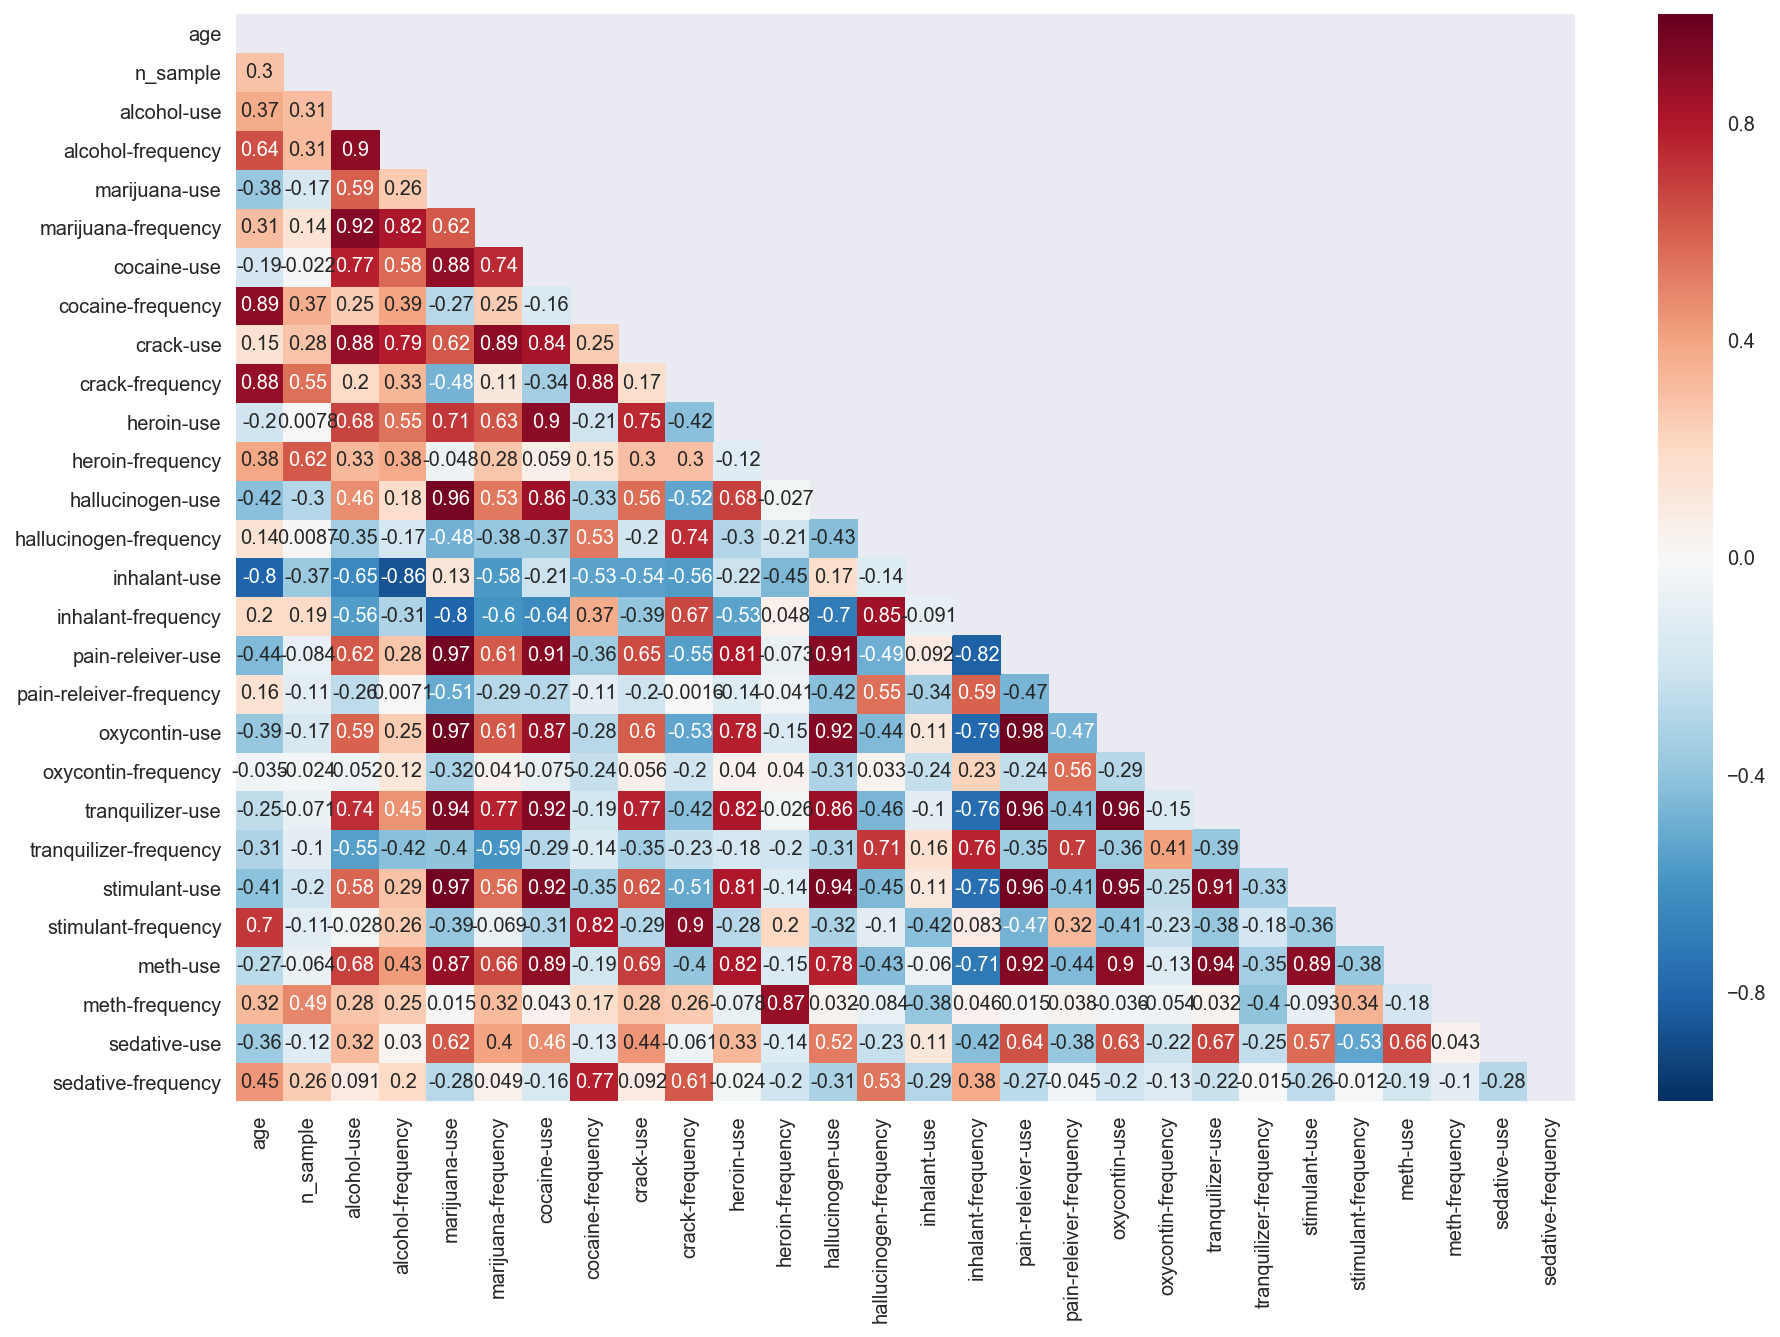

In [122]:
# Make correlation coefficient matrix
corr_mat_drugs = df_drugs.corr()

# Mask upper right triangle.
mask = np.zeros_like(corr_mat_drugs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Matplolib dance
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
ax = sns.heatmap(corr_mat_drugs, fmt='.2g', mask=mask, annot=True)

That was something... Let's split the data into two dataframes one for usage, one for frequency.

In [125]:
# Make Frequency Data Frame

# Make copy of entire data frame
drugs_frequency = df_drugs.copy()

# Loop through columns and drop them if they have '-use' in the name
for c in drugs_frequency.columns :
    if "-use" in c:
        drugs_frequency.drop(c, axis=1, inplace=True)

drugs_frequency.head()

,age,n_sample,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12.0,2798.0,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,13.0,2757.0,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14.0,2792.0,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15.0,2956.0,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16.0,3058.0,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [126]:
# Make -use Data Frame

# Copy main data frame
drugs_use = df_drugs.copy()

# Loop through columns and drop any that have -frequency in name
for c in drugs_use.columns :
    if "-frequency" in c:
        drugs_use.drop(c, axis=1, inplace=True)

drugs_use.head()

,age,n_sample,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12.0,2798.0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13.0,2757.0,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14.0,2792.0,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15.0,2956.0,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16.0,3058.0,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


Now that we've separated the dataframes, let's redo the correlation coefficient matrix.  Only this time there will be two seperate ones, and I will mask any value that that doesn't meet a certain cut off.  That is, if the correlation < cut_off and correlation > -cut_off, it will not be displayed.  The cut off is arbitrary, so let's only keep somewhat highly correlated values, greater than 0.80.
<br>
<br>
#### Note :
The cutoff criteria also acounts for negative correlations.  Meaning we will also get values less than -cut_off.

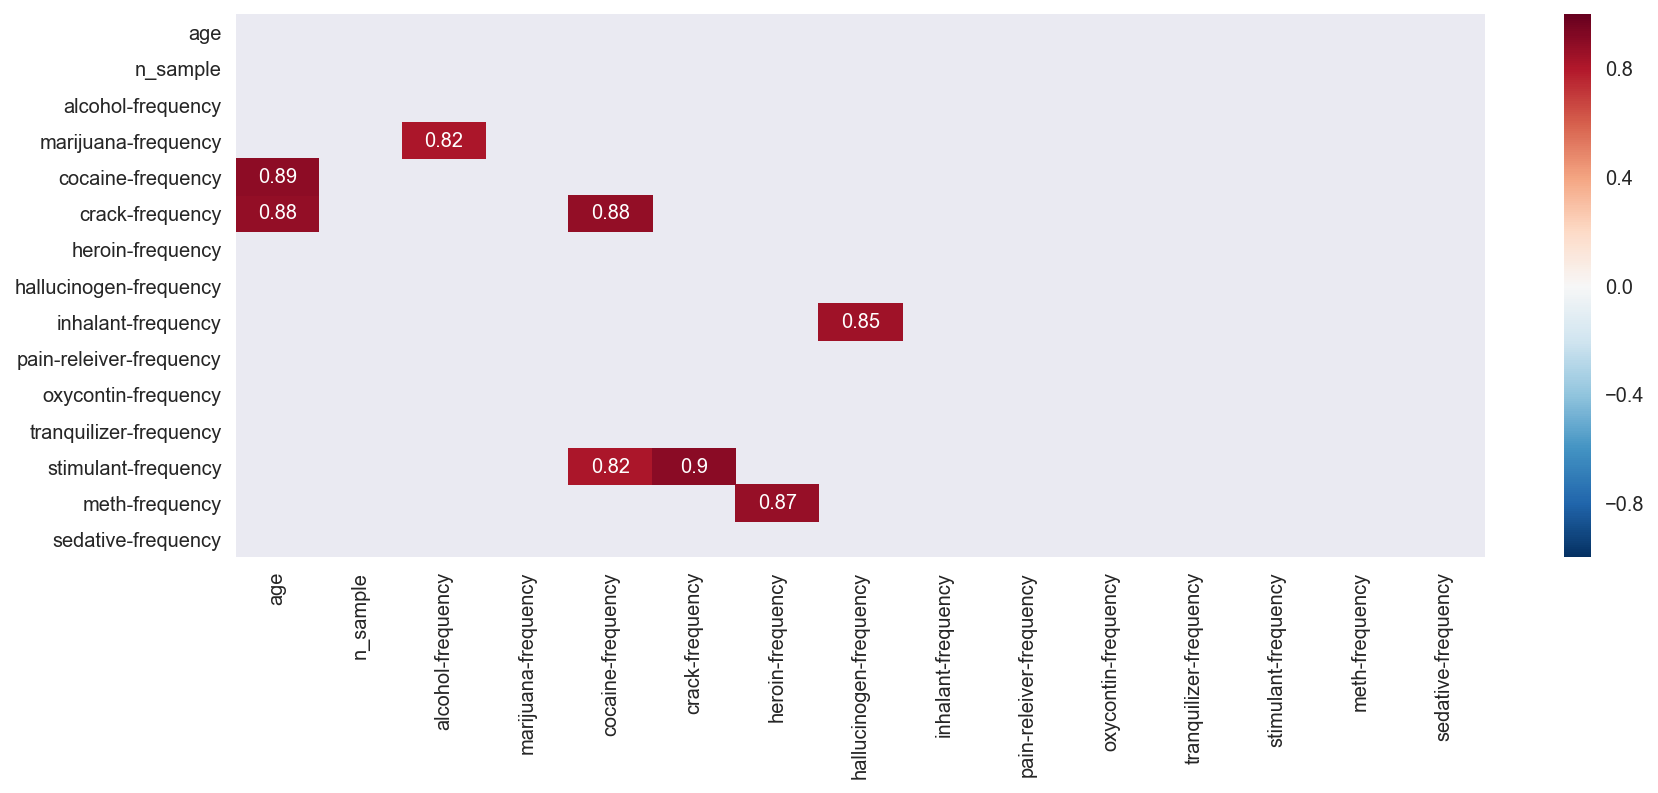

In [130]:
# Get frequency correlation matrix
corr_mat_freq = drugs_frequency.corr()

# Define cutoff
cut_off = 0.8

# Mask upper right triangle, and values that don't meet the cutoff
mask = np.zeros_like(corr_mat_freq, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[(corr_mat_freq <= cut_off) & (corr_mat_freq >= -cut_off)] = True

# Matplotlib dance
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
ax = sns.heatmap(corr_mat_freq, fmt='.2g', mask=mask, annot=True)

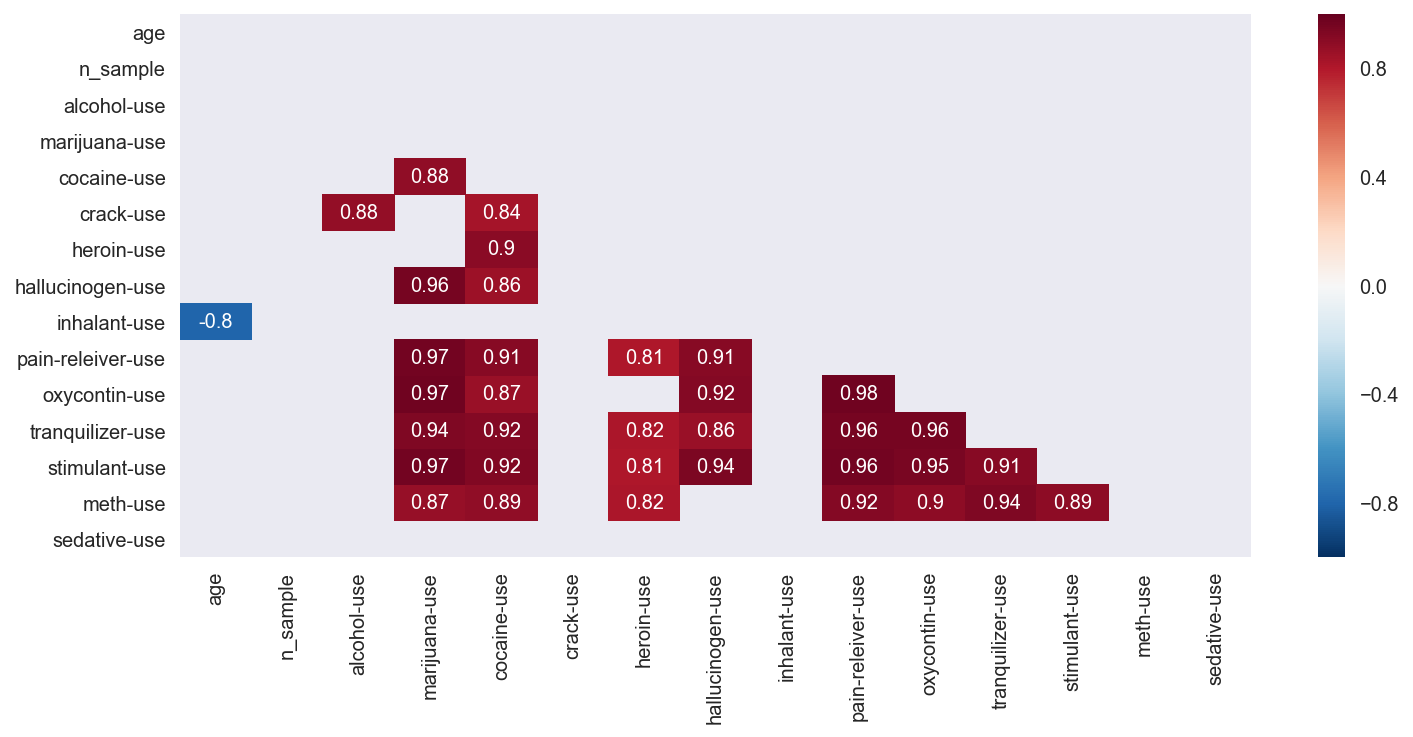

In [131]:
# Get correlation coefficient matrix of drug usage
corr_mat_use = drugs_use.corr()

# Define Cutoff
cut_off = 0.8

# Mask upper right triangle and values that don't make the cutoff
mask = np.zeros_like(corr_mat_use, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[(corr_mat_use <= cut_off) & (corr_mat_use >= -cut_off)] = True

# Matplotlib dance
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
ax = sns.heatmap(corr_mat_use, fmt='.2g', mask=mask, annot=True)

In [36]:
drugs_only = df_drugs.copy()
drugs_only.drop(['n', 'age'], inplace=True, axis=1)
drugs_only.head()

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [37]:
corr_mat = drugs_only.corr()

corr_averages = []
for c in corr_mat.columns:
    values = corr_mat[c][corr_mat[c] != 1.0]
    average = np.mean(abs(values))
    corr_averages.append(average)
 
corr_mat['average_corr'] = corr_averages
corr_mat.head()

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,average_corr
alcohol-use,1.000000,0.897889,0.594165,0.920425,0.773458,0.260301,0.877378,0.337802,0.677614,0.396779,...,-0.033615,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.376863,0.318268,0.091251,0.503040
alcohol-frequency,0.897889,1.000000,0.260219,0.818769,0.577601,0.317172,0.785050,0.364267,0.546194,0.432405,...,0.049388,0.448543,-0.415026,0.291766,0.260304,0.425153,0.252246,0.029867,0.201423,0.379410
marijuana-use,0.594165,0.260219,1.000000,0.615610,0.883789,-0.154879,0.620670,-0.143323,0.711613,0.041377,...,-0.180840,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.218681,0.616766,-0.277144,0.539281
marijuana-frequency,0.920425,0.818769,0.615610,1.000000,0.742598,0.265193,0.892077,0.273167,0.631789,0.346001,...,0.066200,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.417947,0.399124,0.048777,0.504977
cocaine-use,0.773458,0.577601,0.883789,0.742598,1.000000,-0.077848,0.835727,-0.076876,0.899944,0.128866,...,0.017269,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.199366,0.461914,-0.159997,0.525673


In [38]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

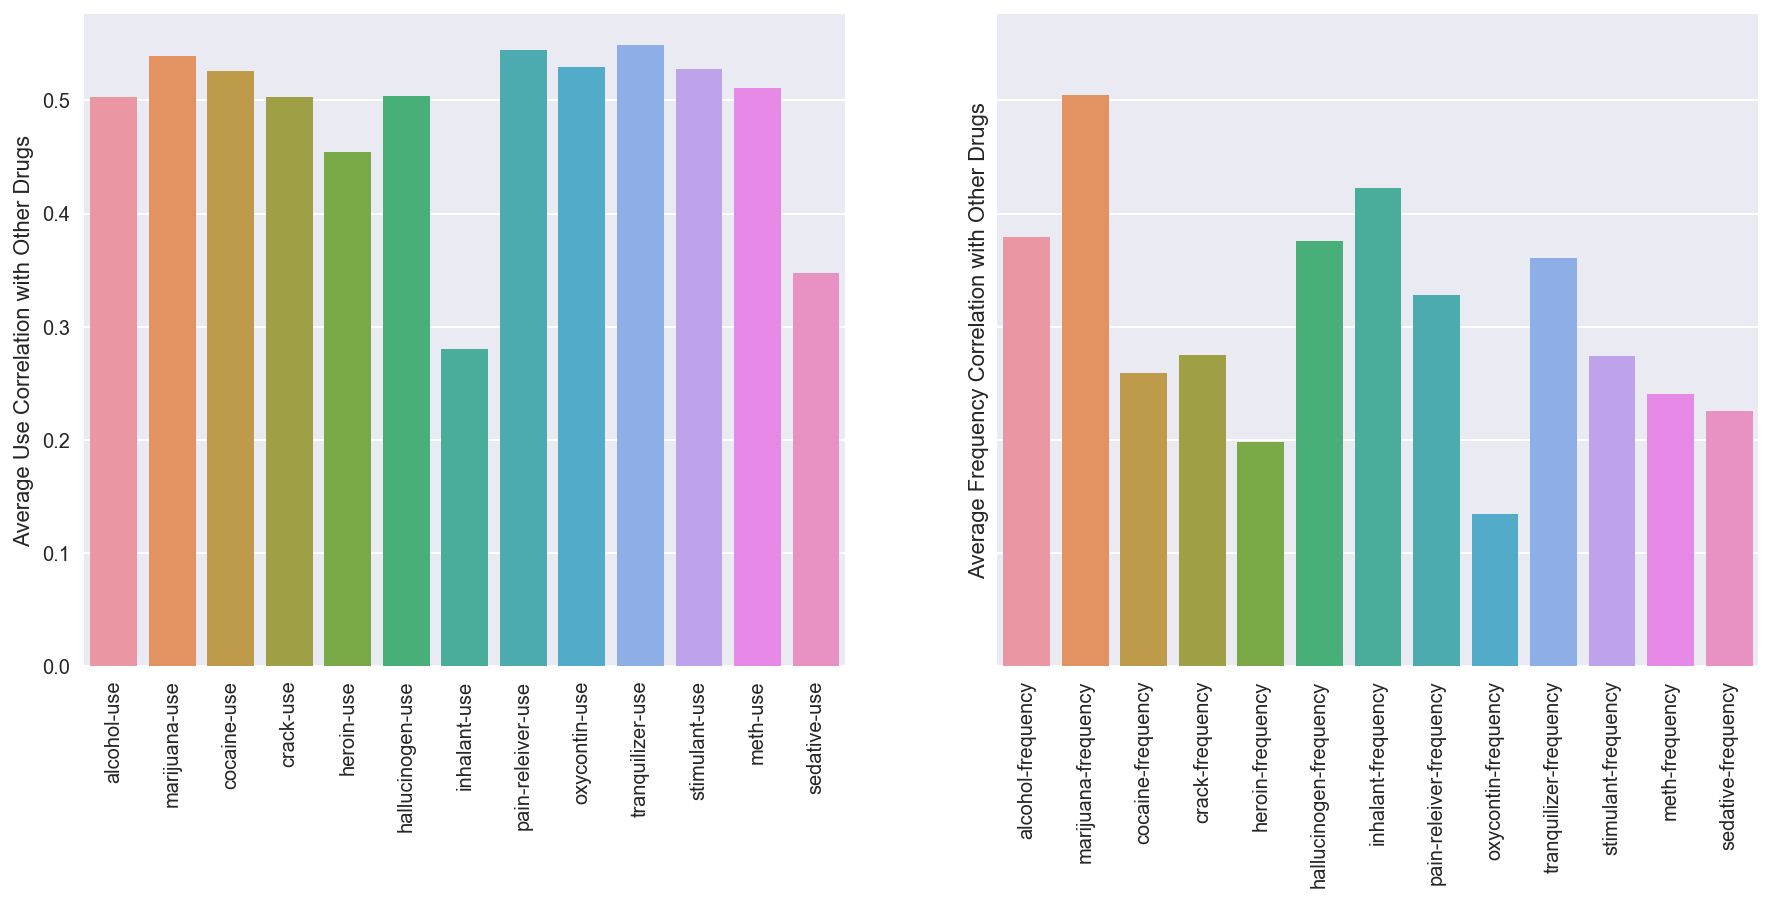

In [39]:
corr_mat_use = corr_mat.copy()
corr_mat_freq = corr_mat.copy()

for c in corr_mat.columns:
    if '-use' in c:
        corr_mat_freq.drop(c, axis=1, inplace=True)
        corr_mat_freq.drop(c, axis=0, inplace=True)
    elif '-frequency' in c:
        corr_mat_use.drop(c, axis=1, inplace=True)
        corr_mat_use.drop(c, axis=0, inplace=True)
        
c_use  = corr_mat_use.columns
c_freq = corr_mat_freq.columns


f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6), sharey=True)
sns.barplot(x=c_use[:-1], y=corr_mat_use['average_corr'], ax=ax1)
sns.barplot(x=c_freq[:-1], y=corr_mat_freq['average_corr'], ax=ax2)

ax1.set_xticklabels(c_use[:-1], rotation='vertical')
ax1.set_ylabel("Average Use Correlation with Other Drugs")

ax2.set_xticklabels(c_freq[:-1], rotation='vertical')
ax2.set_ylabel("Average Frequency Correlation with Other Drugs")

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


I am not sure what more I can say after the previous EDA.  It seems that it terms of *usage* the over all population has an experimental phase in their early twenties, and declines over time.  *Frequency* is a bit more erratic, it's harder to see any trends by age group, but certain drugs seem to have huge peaks in *frequency* during certain ages.  Also, the peak in some drugs are much more pronounced than in others.  For example heroin, which I suppose is because it is highly addictive.  The fact that alcohol caps in frequency is pretty interesting, I guess people have a pretty common standard about how much they want to drink.  Oddly enough, I would have thought that `alcohol` frequency would have peaked in the twenties as well (college and all that), so that was surprising.

Correlation wise, I've plotted the average correlation coefficient for each drug.  Most of them are in the same ball park.  In terms of *usage* `inhalants` is the least correlated one (on average).  In terms of frequency, that honor goes to `oxycotin`.  

In [40]:
mj_freq_ratios = drugs_frequency.copy()

for c in mj_freq_ratios.columns:
    if (c == 'age' or c == 'n' or c=='marijuana-frequency'):
        continue
    
    else :
        mj_freq_ratios[c] -= mj_freq_ratios['marijuana-frequency']
        
mj_freq_ratios.head()

,age,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12.0,2798.0,-1.0,4.0,1.0,-4.0,31.5,48.0,15.0,32.0,20.5,48.0,-2.0,-4.0,9.0
1,13.0,2757.0,-9.0,15.0,-14.0,-12.0,-15.0,-9.0,-3.0,-1.0,26.0,10.5,-11.0,-10.0,4.0
2,14.0,2792.0,-19.0,24.0,-18.5,-24.0,-22.0,-21.0,-19.0,-12.0,-19.5,-19.0,-12.0,0.0,-7.5
3,15.0,2956.0,-19.0,25.0,-21.0,-15.5,-24.0,-21.0,-19.5,-15.0,-22.0,-20.5,-19.0,-14.5,5.0
4,16.0,3058.0,-20.0,30.0,-23.0,-29.0,36.5,-27.0,-27.0,-23.0,-26.0,-19.0,-20.5,6.0,-27.0


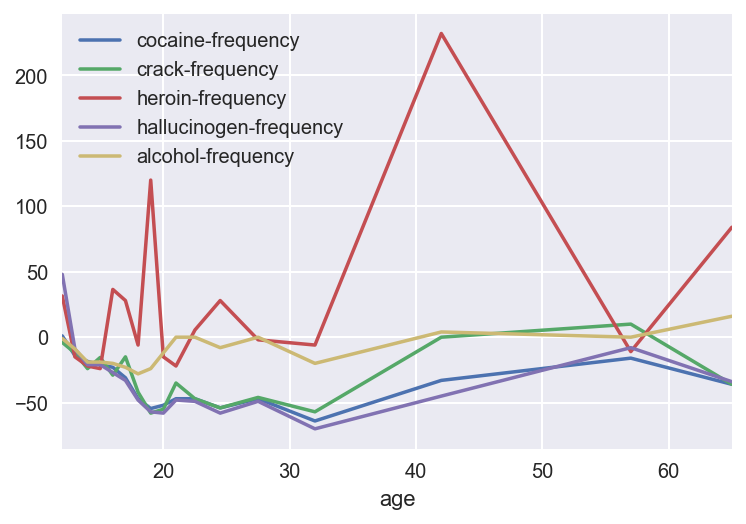

In [41]:
ax = mj_freq_ratios.plot(x='age', y='cocaine-frequency')
mj_freq_ratios.plot(x='age', y='crack-frequency', ax=ax)
mj_freq_ratios.plot(x='age', y='heroin-frequency', ax=ax)
mj_freq_ratios.plot(x='age', y='hallucinogen-frequency', ax=ax)
mj_freq_ratios.plot(x='age', y='alcohol-frequency', ax=ax)

In [42]:
mj_use_ratios = drugs_use.copy()

for c in mj_use_ratios.columns:
    if (c == 'age' or c == 'n' or c=='marijuana-use'):
        continue
    
    else :
        mj_use_ratios[c] *= 1./mj_use_ratios['marijuana-use']
        
mj_use_ratios.head()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12.0,2798.0,3.545455,1.1,0.090909,0.000000,0.090909,0.181818,1.454545,1.818182,0.090909,0.181818,0.181818,0.000000,0.181818
1,13.0,2757.0,2.500000,3.4,0.029412,0.000000,0.000000,0.176471,0.735294,0.705882,0.029412,0.088235,0.088235,0.029412,0.029412
2,14.0,2792.0,2.080460,8.7,0.011494,0.000000,0.011494,0.183908,0.298851,0.448276,0.045977,0.103448,0.091954,0.011494,0.022989
3,15.0,2956.0,2.013793,14.5,0.034483,0.006897,0.013793,0.144828,0.172414,0.379310,0.055172,0.137931,0.103448,0.020690,0.027586
4,16.0,3058.0,1.782222,22.5,0.044444,0.000000,0.004444,0.151111,0.133333,0.275556,0.048889,0.106667,0.080000,0.013333,0.008889


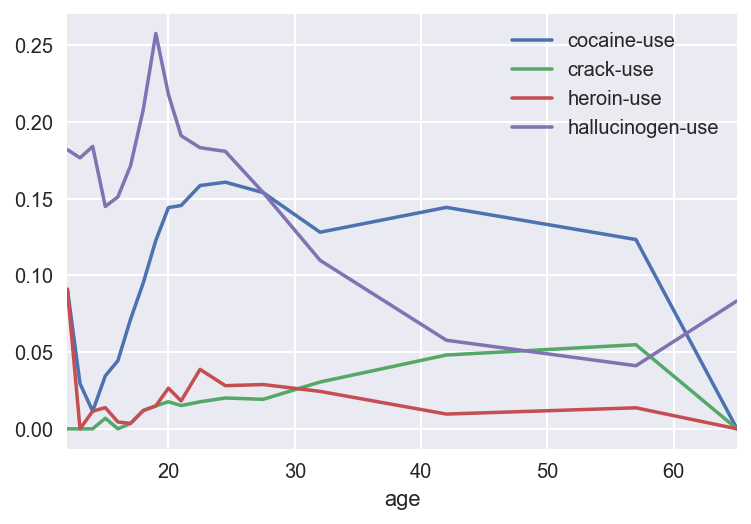

In [43]:
ax = mj_use_ratios.plot(x='age', y='cocaine-use')
mj_use_ratios.plot(x='age', y='crack-use', ax=ax)
mj_use_ratios.plot(x='age', y='heroin-use', ax=ax)
mj_use_ratios.plot(x='age', y='hallucinogen-use', ax=ax)

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [44]:
# Pull out rate variable from dataset
rate = df_sat['Rate']

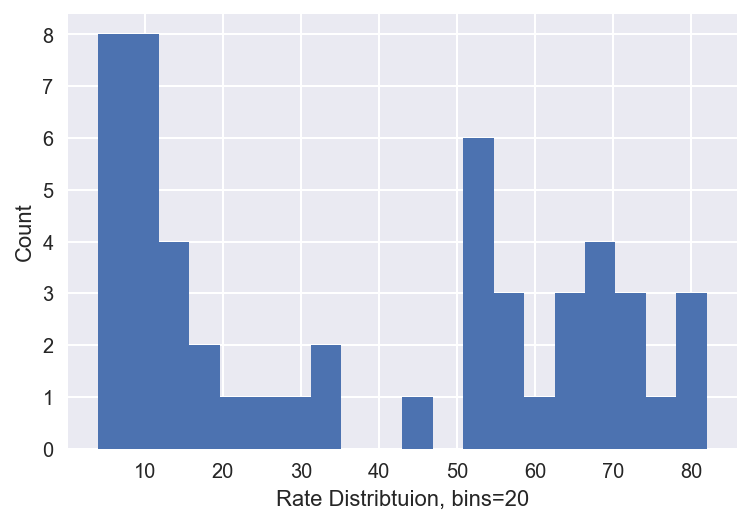

In [45]:
plt.hist(rate, bins=20)
plt.xlabel('Rate Distribtuion, bins=20')
plt.ylabel('Count')

In [46]:
pprint(np.sort(rate))

array([ 4,  4,  4,  5,  5,  6,  6,  7,  8,  8,  8,  9,  9,  9, 11, 11, 12,
       12, 13, 13, 17, 18, 23, 26, 31, 33, 34, 45, 51, 51, 52, 53, 53, 54,
       55, 56, 57, 60, 63, 65, 65, 67, 68, 69, 69, 71, 71, 72, 77, 79, 81,
       82])


In [47]:
# Are there outliers in the dataset? Define, in words, how you numerically define outliers
rate_mean = np.mean(rate)
rate_std  = np.std(rate)
rate_median = np.median(rate)
print('RAW DATA')
print('Npoints : {}'.format(len(rate)))
print("Mean : {} \nMedian : {} \nSTD : {} \n ".format(rate_mean, rate_median, rate_std))

RAW DATA
Npoints : 52
Mean : 37.15384615384615 
Median : 33.5 
STD : 27.03799649452359 
 


It's hard to tell since the rates have such a wide range.  But generally speaking, an outlier can considered to be a point that is outside 1 standard deviation from the mean.  But based on that definition, it would mean that only rates between ~20 and ~64 are not outliers.  The problem with this definition is that it assumes a normal distribution, which is clearly not the case (as seen in the histogram above).  

A better way to define outliers in the data would be to assume a double Gaussian distribution, such as in this image (from stackoverflow.com) :

<img src="double_gaussian.jpg" style="float: left; margin: 25px 15px 0px 0px; height: 300px">

With this kind of distribution, an outlier would be defined as not being inside 1 standard deviation of either Gaussian.
To summarize, outliers are tricky. In order to define them you have to assume some kind of distribution, which will never be exact.  For the sake of the this excercise though, I will assume a single gaussian.

In [48]:
# Print out the outliers in the dataset.
outliers = [r for r in rate if (r < rate_mean - rate_std or r > rate_mean + rate_std)]
print("outliers : \n{} \n".format(np.sort(outliers)))

Nout = len(outliers)
per_outliers = 100.* len(outliers) / len(rate)
print("Number of outliers : {}".format(Nout))
print("percent of outliers : {}".format(per_outliers))

outliers : 
[ 4  4  4  5  5  6  6  7  8  8  8  9  9  9 65 65 67 68 69 69 71 71 72 77 79
 81 82] 

Number of outliers : 27
percent of outliers : 51.92307692307692


Based on this definition about 51% of our data points in `Rate` are considered outliers.  Perhaps we should be more lenient, but all these points are within 2 standard deviations, which would mean no outliers.  Again, the problem with this definition, is that it assumes a normal distribution.

In [49]:
# Remove the outliers from the dataset.
clean = [r for r in rate if (r >= rate_mean - rate_std and r <= rate_mean + rate_std)]
print('clean data set : \n {} \n'.format(np.sort(clean)))

mean_clean = np.mean(clean)
median_clean = np.median(clean)
std_clean  = np.std(clean)
print('CLEAN DATA')
print('Npoints : {}'.format(len(clean)))
print('Mean : {}'.format(mean_clean))
print('Median : {}'.format(median_clean))
print('STD : {}'.format(std_clean))

clean data set : 
 [11 11 12 12 13 13 17 18 23 26 31 33 34 45 51 51 52 53 53 54 55 56 57 60 63] 

CLEAN DATA
Npoints : 25
Mean : 36.16
Median : 34.0
STD : 18.598236475537135


In [50]:
# Compare the mean, median, and standard deviation
# of the "cleaned" data without outliers to the original. 
# What is different about them and why?

Data statistic comparison : 

|        | Mean  | Median | Standard Deviation  | N points |
|--------|-------|--------|---------------------|----------|
| Raw    | 37.15 | 33.5   | 27.02               | 52       |
| Clean  | 36.16 | 34.0   | 18.60               | 25       |

- The **mean** decreased, at first glance I would say because there were more outliers on the lower end.  Looking back the outlier list though, this is not the case.  There are 14 outliers on the lower end, and only 13 on the upper end (almost the same though). Instead the outliers on the upper must be further out.

- The **median** is almost the same but increased by 0.5.  The number of points taken from each end is almost the same.  The thing here is that we went from an even number of points to an uneven one.  For an even number of points, the mean is calculated as the midpoint between the two central points.  For an odd number, it's just the center point.

- The **standard deviation** Fell quite a bit.  I guess that's just because we now have a tighter data set.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [51]:
from scipy import stats

In [52]:
scores = df_sat.copy()

# Spearkman correlation
rho_spear, pvalue_spear = stats.spearmanr(scores['Verbal'], b=scores['Math'], axis=0)
print("spearman corr = {} \n pvalue = {}".format(rho_spear, pvalue_spear))

# Pearson Correlation
P = np.corrcoef(scores['Verbal'], y=scores['Math'])
print('\n Pearson Correlation Matrix')
print(P)

spearman corr = 0.9052048847940284 
 pvalue = 3.235231959777518e-20

 Pearson Correlation Matrix
[[ 1.          0.89987085]
 [ 0.89987085  1.        ]]


Both coefficients are very similar, but the Pearson one is slightly lower.  This is normal because the relationship seems to be more or less linear.
<br>
<br>
- *Describe clearly in words the process of calculating the spearman rank correlation*
<br>
<br>
Not sure how to only use words, so let's start with the equation : 
<br>
<br>
$$
\rho_s = \frac{\text{cov} (r_x, r_y)}{\sigma_{r,x} \sigma_{r,y}} 
$$
<br>
<br>
This calculation is a measure of correlation, and direction of two ordinal variables. That is, whether or not one variable increases (or decreases) as another one increases.
The difference with the Peason coefficient is that it is not assuming any linear, quadratic, or other kind of relationship, just whether it increases or decreases. 
Looking back at the equation, the Spearman rank coefficient, $\rho_s$ is the ratio of the covariance of variable ranks, to the product of the rank standard deviations.  The ranks in question, are simply their position in the data when sorted.  For example, if we have a list of data : `[8, 9, 5, 6]` we sort the variables and rank them :
<br>
<br>
sorted data : $[ 8, 9, 5, 6 ] \rightarrow [ 5, 6, 8, 9 ]$
<br>
<br>
From there we assign a rank to each point in the data set:
<br>
<br>
$  9 \rightarrow \text{rank} = 1$ <br>
$  8 \rightarrow \text{rank} = 2$ <br>
$  6 \rightarrow \text{rank} = 3$ <br>
$  5 \rightarrow \text{rank} = 4$ <br>
<br>
<br>
If there are repeated ranks, we would take the median value of the two ranks.  For example, if we have two rank 4's.  We can not assign one 4 and one 5, so they would both have rank 4.5.  Doing this again for the second data set (which needs to be the same length), we can then calculate the covariance of the ranks, $\text{cov}(r_x, r_y)$, and their standard deviations, $\sigma_{rx}$ and $\sigma_{ry}$.
<br>
<br>
On the other hand the Pearson correlation coefficient, $\rho_{x,y}$, is written as : 
<br>
<br>
$$
\rho_{x,y} = \frac{\text{cov}(x, y)}{\sigma_x \sigma_y}
$$
<br>
<br>
where $\sigma_x$, $\sigma_y$ are the standard deviations of the actual data, and $\text{cov}(x,y)$ is the covariance between $x$ and $y$ (the actual data).
<br>
<br>
To summarize in one sentence, the spearman rank correlation is the pearson correlation coefficient of the ranks of the data.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [53]:
df_sat['percentile'] = df_sat['Rate'].apply(lambda x : stats.percentileofscore(df_sat['Rate'], x))
df_sat.head()

,Rate,Verbal,Math,percentile
State,,,,
CT,82,509,510,100.000000
NJ,81,499,513,98.076923
MA,79,511,515,96.153846
NY,77,495,505,94.230769
NH,72,520,516,92.307692


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

- *Why might percentile scoring be useful for dealing with outliers?*
<br><br>
Perhaps it could be used as a cut off for outliers (instead of using the mean and standard deviation).  For example we could consider a point to be an outlier if is above the 90th Percentile, or below the 10th percentile.  Of course this wouldn't make sense if our data is tightly packed. <br><br>

- *Plot the distribution of a variable of your choice from the drug use dataset*

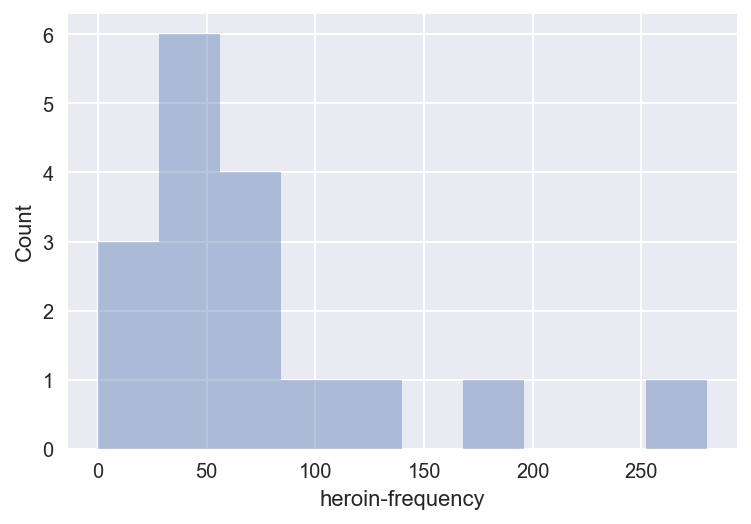

In [54]:
# Going with heroin-frequency
ax0 = sns.distplot(df_drugs['heroin-frequency'], kde=False, bins=10)
ax0.set_ylabel('Count')

- *Plot the same variable but percentile scored.*

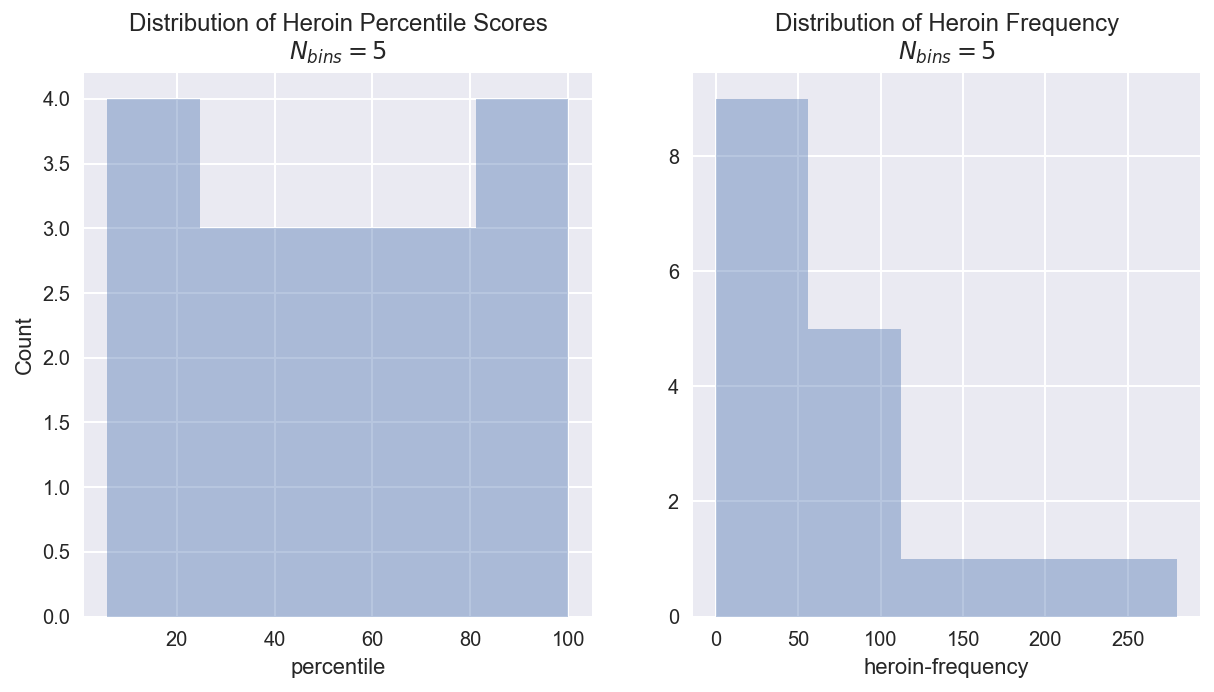

In [55]:
heroin = df_drugs[['heroin-frequency']].copy()
heroin.rename(columns={'heroin-frequency' : 'freq'}, inplace=True)
heroin['percentile'] = heroin['freq'].apply(lambda x: stats.percentileofscore(heroin['freq'], x))

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.distplot(heroin['percentile'], kde=False, bins=5, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Heroin Percentile Scores\n$N_{bins}=5$')

sns.distplot(df_drugs['heroin-frequency'], kde=False, bins=5, ax=ax2)
ax2.set_title('Distribution of Heroin Frequency\n$N_{bins}=5$')

- *Describe the effect, visually, of converting raw scores to percentile.* <br><br>
When plotting the distribution of the raw data, we can see around which values the data tends to be.  When plotting the distribution of the percentiles... you mostly get a flat distribution (but depends on the number of bins).  I'm not really sure if this actually means anything though.  By definition a numbers percentile score is the percentage of values in the data set that are below it, so the distribution should always be even.  In the plot we see that the count goes to 4 instead 3 on the extremes.  But I think that might just be a result of bining them, and where the cut off is, and possibly if there's an odd or even number of values. <br><br>

Perhaps I am missing something here.  Let's try plotting the `heroin-frequency` values as a function of their `percentile` scores.

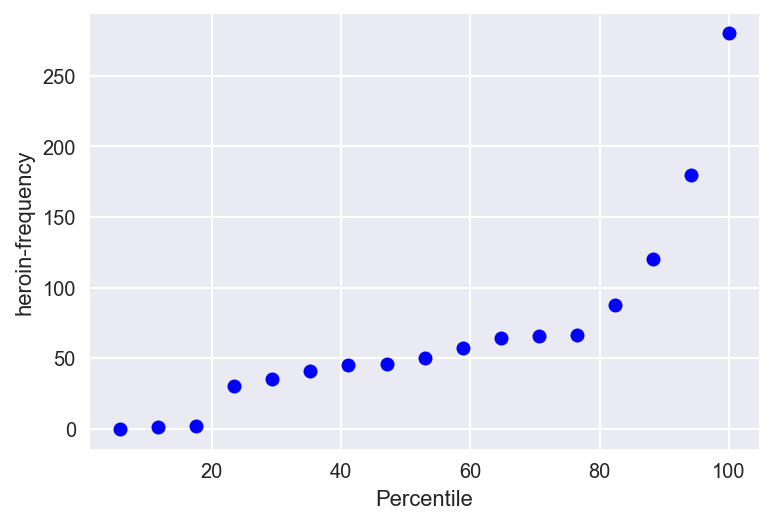

In [56]:
plt.plot(heroin['percentile'], heroin['freq'], 'bo')
plt.xlabel('Percentile')
plt.ylabel('heroin-frequency')

Ah, this speaks to me a lot more than plotting the distribution of percentiles.  From this we can more easily identify outliers.  We can see that mid-values (from the 20th to the 80th) percentile follow more or less the same trend.  Below that (the first three points) are shifted down, and the last few points go up exponentially!  This might mean that competitive heroin users are truly in a different league that casual users.  Or perhaps the data is skewed... one may never know!